In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
arr = np.load('results/pressure_data.npy')
print(arr.shape)

arr2 = np.load('results/time_info.npy',allow_pickle=True)
print(arr2.shape)
arr2

(107, 117, 79, 6)
()


array({'time_values': [0.0, 3652.0, 7305.0, 10957.0, 189926.0, 372547.0], 'time_dates': ['2030-Jan-01', '2040-Jan-01', '2050-Jan-01', '2060-Jan-01', '2550-Jan-01', '3050-Jan-01'], 'shape': (107, 117, 79, 6)},
      dtype=object)

In [2]:
from fgrid2npy_JD import extract_fgrid_coordinates
coor_npy = extract_fgrid_coordinates(
    fgrid_file_path = "data/JD_Sula_2025_flow.fgrid",
    save_dir = "results/fgrid_coordinates.npy"
    )

Parsing .fgrid file: data/JD_Sula_2025_flow.fgrid
Grid dimensions: 107, 117, 79
Grid dimensions: I=107, J=117, K=79
Units: METRES  
Processing 989001 coordinate sections...
Total cells processed: 989001
Cells filled: 989001/989001 (100.0%)
Coordinates array shape: (107, 117, 79, 3)
Coordinates array dtype: float64
Coordinate Statistics:
  X range: 424730.20 to 477843.57
  Y range: 7072225.88 to 7129985.88
  Z range: 348.63 to 2865.07
Data saved to results/fgrid_coordinates.npy


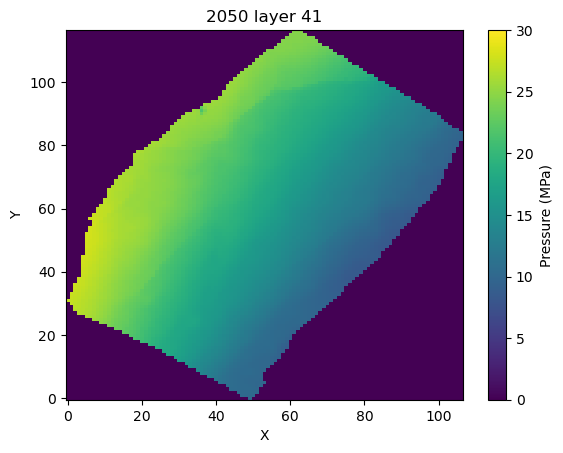

In [29]:
prop = "PRES"; layer = 41; year = 2050; year_list = [2030, 2040, 2050, 2060, 2550, 3050]
arr = np.load('results/pressure_data.npy') #SG, PRES, VERDSPLGEO
arr_slice = arr[:,:,layer-1,year_list.index(year)]
plt.imshow(arr_slice.T/1000, origin='lower', cmap='viridis', interpolation=None, aspect='auto', vmin=0, vmax=30)
#plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label="Pressure (MPa)")
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'{year} layer {layer}')
plt.show()

In [3]:
# --- 2D Array (Matrix) ---
# Create a list of lists
my_list_2d = [[1, 2, 3],
              [4, 5, 6]]
# Convert the list of lists to a 2D NumPy array
my_array_2d = np.array(my_list_2d)
save_dir = "results/my_array_2d.npy"
np.save(save_dir, my_array_2d)

In [9]:
arr_shape=(2,3,4)
arr=np.arange(1,25)
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [12]:
arr3d=arr.reshape(arr_shape[2],arr_shape[1],arr_shape[0])
arr3d

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16],
        [17, 18]],

       [[19, 20],
        [21, 22],
        [23, 24]]])

In [14]:
arr3d[0,2,1]

6

In [17]:
arr3d = np.transpose(arr3d, axes=(2, 1, 0))
arr3d

array([[[ 1,  7, 13, 19],
        [ 2,  8, 14, 20]],

       [[ 3,  9, 15, 21],
        [ 4, 10, 16, 22]],

       [[ 5, 11, 17, 23],
        [ 6, 12, 18, 24]]])

In [19]:
arr3d[1,2,0]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [40]:
from CMG_format_decompress import CMG_format_decompress
fault_id = CMG_format_decompress('data/JD_Sula_2025_flow_fault_id.GRDECL')
# fault_id = fault_id.astype(int)
print(fault_id.shape)
print(fault_id.dtype)

(989001,)
float64


In [31]:
print(coor_npy.shape)

(107, 117, 79, 3)


In [ ]:
i=107; j=117; k=79;
nan_slice = np.full((i,j,k,1), np.nan)
nan_slice.shape

fault_npy = np.concatenate((coor_npy, nan_slice), axis=3)
fault_npy.shape

for ii in range(i):
    for jj in range(j):
        for kk in range(k):
            fault_npy[ii,jj,kk,3] = fault_id[kk*j*i+jj*i+ii]

# fault_npy[:,:,:,3] = fault_npy[:,:,:,3].astype(int)
fault_npy.shape
fault_npy[:,:,:,3].dtype

# flip the j direction, because Petrel count j from top to bottom, and CMG count j from bottom to top.
fault_npy = fault_npy[:,::-1,:,:]

In [59]:
fault_npy[94,43,40,3]
# type(fault_npy[36,91,40,3])
# fault_npy[:,:,:,3].dtype
fault_npy[50,117-1-25,40,3]

7.0